<h2 style="text-align:center;">Decoding the Video Game Industry: Strategies for Successful Launches</h2>

### 1. Introduction

This project aims to identify patterns that could forecast the success or failure of video game releases, thereby aiding in the planning of future advertising campaigns.

The dataset provided encompasses a wealth of information, including user and expert reviews, game genres, platforms, historical sales data, and ESRB ratings.

The analysis was conducted by region, considering North America, Europe, Japan, and other regions, and across different platforms like Wii, Xbox360, and all versions of PlayStation up to version 6.

In general terms, the conclusions indicate that:

* Considering the specific characteristics of the target market is crucial, as each region has different dynamics.

* Creating a video game that aligns with the most popular genres in the target market can significantly impact its success. Additionally, the choice of platform is important.

* However, when it comes to platforms, it's necessary to consider the year of release as a factor that can influence sales leadership.

* Finally, the relationship between critics' reviews and video game sales is not very clear, so it's not necessarily a determining factor.



### 2. Importing Libraries and Loading Datasets

In [208]:
# Import the libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from PIL import Image
import seaborn as sb
from scipy.stats import ttest_ind

In [209]:
# Load the database
df= pd.read_csv('C:/Users/Natalia Lopera/Documents/Python_projects/VideoGames/games (1).csv') 

#Print the company_info dataframe
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [210]:
#Print the df dataframe information
df.info() 

#Counting null values in each column
print(df.isna().sum()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
R

In [211]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


General Comments:

* The columns 'other_sales', 'jp_sales', 'eu_sales', 'na_sales', and 'platform' are the only ones without null values. Among these, the platform column is of object type, which is appropriate. The remaining columns have float type data, which is also assumed to be appropriate for now.

* The 'name' and 'genre' columns have two null values each. Both columns are of object type, which is suitable.

* The 'year_of_release' column has approximately 269 null values. This column is currently of float type, but it's more appropriate to change it to int (integer) since it represents release years. Null values were replaced with 0 to facilitate the conversion from float to int.

* The 'critic_score' column has approximately 8,578 null values. It's currently of float type, and it's decided to leave it as is. Converting it to int would require replacing null values with some quantitative value, which could be misleading, so it's kept as float.

* The 'user_score' column has 6,701 null values. It's currently of object type, which is not suitable since the data is floating-point numbers. Therefore, it's decided to change the data type from object to float.

* The 'rating' column has 6,766 null values. It's of object type, which is appropriate.

* All text will be converted to lowercase, and a unified format for word separation will be applied to columns like 'name' and 'genre'.

### 3. Data Processing

In [212]:
#The name of all columns is changed to lowercase
df.columns=df.columns.str.lower()

In [213]:
# Replace NaN values with 0
df['year_of_release'] = df['year_of_release'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

# Convert the 'year_of_release' column to int
df['year_of_release'] = df['year_of_release'].astype('int')

Handling Missing Values



In [214]:
#Null data in qualitative columns is replaced with a blank space.
columns_to_replace = ['name', 'genre', 'rating']

for col in columns_to_replace:
    df[col] = df[col].fillna(' ')
    
df['user_score'] = df['user_score'].replace('tbd', 'Nan')

print(df['user_score'].sample(20))

5320     4.7
10847    Nan
5951     5.2
12762    6.9
6298     Nan
14766      0
8128     7.5
2472     7.6
5018     8.1
9165       0
9989       6
6263       0
4757     8.8
9048       0
8546       0
9525       0
4542       0
13070      0
3634       0
11085    7.6
Name: user_score, dtype: object


In [215]:
#Check that the above was executed successfully
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.3+ MB


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating                0
dtype: int64

General Comments:

* For columns with qualitative data (object), missing values were replaced with a blank space.

* For columns with quantitative values, specifically in the user_score and critic_score columns, null values were left as they are, and in the case of year_of_release, they were replaced with 0.

* The user_score column has some 'tbd' values, which will be treated as null values since they do not provide any useful information.

* Regarding the name column, the relevance of removing the two rows with null data was considered. However, upon reviewing the minimum and maximum values, as well as the mean and median of regional sales, it was decided not to remove them. These data points might still hold relevance, and trends could potentially be established based on the platform and release year.

* The data in the year_of_release column was converted to integer type (int) to enable the use of methods like min() and max(). However, since these are years, calculating the mean doesn't make much sense. Therefore, the median was used to replace missing values.

*Character Systematization in Columns Name, Platform, Rating, and Genre*

In [216]:
#The "K-A" category is replaced with the "E" category.
df['rating']=df['rating'].replace('K-A', 'E')

#Lowercase all letters in the name, platform, and genre columns
df[['name', 'platform', 'genre']]= df[['name', 'platform', 'genre']].apply(lambda x: x.str.lower())

#Remove certain characters from the name column
df['name'] = df['name'].str.replace('.', '', regex=False).str.replace('!', '', regex=False).str.replace(':', '', regex=False).str.replace('-', ' ', regex=False).str.replace('/', '-', regex=False)

**General Comments:**

* Rating Column:
Meaning of the categories: (E: Everyone, E10+: Everyone 10 and older, T: Teen or 13 years or older, M: Mature, AO: Adults only, EC: Early Childhood, RP: Rating Pending, K-A: This classification means Kids to adults. Until 1998, it was used to refer to the everyone classification, but after that year, it was changed to E to avoid confusion, so here, we will also replace this category with E).

In this column, categories will be kept in uppercase, as it's the classification format, and also because all have the same format.

* Several characters were removed from the name column. This column used '/' to separate some words, but to unify it with the format of the genre column, it was changed to the symbol '-'.

In [217]:
#Displaying the data of the first row in the DataFrame
print(df.loc[0])

name               wii sports
platform                  wii
year_of_release          2006
genre                  sports
na_sales                41.36
eu_sales                28.96
jp_sales                 3.77
other_sales              8.45
critic_score             76.0
user_score                  8
rating                      E
Name: 0, dtype: object


In [218]:
#Generating descriptive statistics of the DataFrame
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,16715.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,1974.193599,0.263377,0.145060,0.077617,0.047342,68.967679
std,252.559930,0.813604,0.503339,0.308853,0.186731,13.938165
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


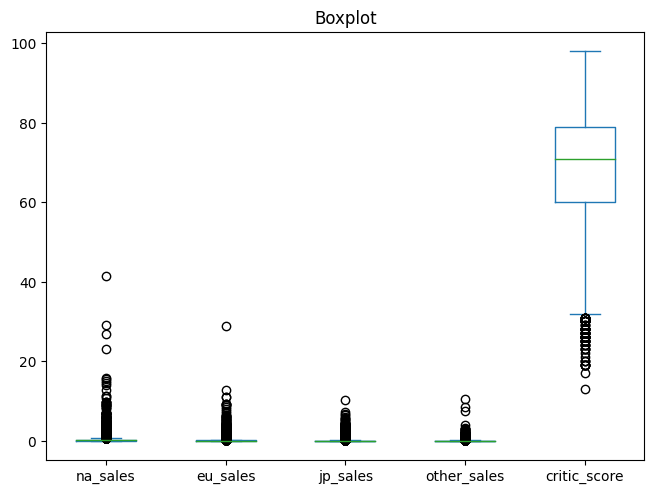

In [219]:
#Graph box plot diagram

df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score']].plot(kind='box', title= 'Boxplot');
plt.tight_layout(pad= 0.2, w_pad=1.0, h_pad=8.0);
plt.show();
#df['na_sales'].plot(kind='box');
#df['eu_sales'].plot(kind='box');
#df['jp_sales'].plot(kind='box');
#df['other_sales'].plot(kind='box');
#df['critic_score'].plot(kind='box');

In [220]:
#Check the frequency of values in the critic_score dataset
frecuencia_valores = df['critic_score'].value_counts().sort_values(ascending=False).head(35)

**General Comments:**

* year_of_release is a discrete and categorical quantitative variable, so analyzing the mean wouldn't make much sense, and therefore, neither would the standard deviation.

* na_sales, eu_sales, jp_sales, and other_sales have a low standard deviation, but upon observing the boxplot, some outliers can be seen. This warrants a more specific analysis: The minimum value of na_sales is 0, with 25% of values also below 0. The 50th percentile is below 0.02, and the 75th percentile is below 0.24. Although 75% of the data is relatively close to the mean, ranging from 0.24 to 41.36, the latter values are considered outliers. The standard deviation might not be very high because, as mentioned, 75% of the data is close to the mean (0.26), but this doesn't negate the existence of outliers. The same logic applies to eu_sales, jp_sales, and other_sales.

* User score has a standard deviation of 1.500, indicating increased dispersion compared to the mentioned columns. However, it's not considered excessively high. This column exhibits similar dynamics to those explained earlier, with a negative trend. 50% of the data falls between 7.50 and almost 4, but the minimum value is 0, suggesting a set of uncommon data points that are observed as outliers in the boxplot.

* The standard deviation of Critic score is 13.93, which, compared to the other columns, could be considered significant. The boxplot shows the existence of some outliers, skewed towards the left (lower values). The minimum value is 13.000, but 25% of the data falls between 35 and 60, indicating outliers beyond this range, particularly towards smaller values.

### 4. *Data Analysis* 

In [221]:
#The total_sales column is added for each video game.
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']


In [222]:
#Video games are grouped by year of release
game_per_year= df.groupby(['year_of_release','name'])['year_of_release'].count().reset_index(name='total')

#Filter to find the names of the video games based on the year of release
game_per_year_filtered = game_per_year[game_per_year['year_of_release'] == 2008]
game_per_year_filtered

,year_of_release,name,total
6940,2008,007 quantum of solace,6
6941,2008,1 vs 100,1
6942,2008,100 classic books,1
6943,2008,101 in 1 explosive megamix,1
6944,2008,12riven the psi climinal of integral,1
...,...,...,...
7973,2008,zoo tycoon 2 ds,1
7974,2008,zoo tycoon 2 ultimate collection,1
7975,2008,zoo vet endangered animals,1
7976,2008,zubo,1


In [223]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,super mario bros,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,0,,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,pokemon red-pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,0,,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,samurai warriors sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,0,,0.01
16711,lma manager 2007,x360,2006,sports,0.00,0.01,0.00,0.00,NaN,0,,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,0,,0.01
16713,spirits & spells,gba,2003,platform,0.01,0.00,0.00,0.00,NaN,0,,0.01


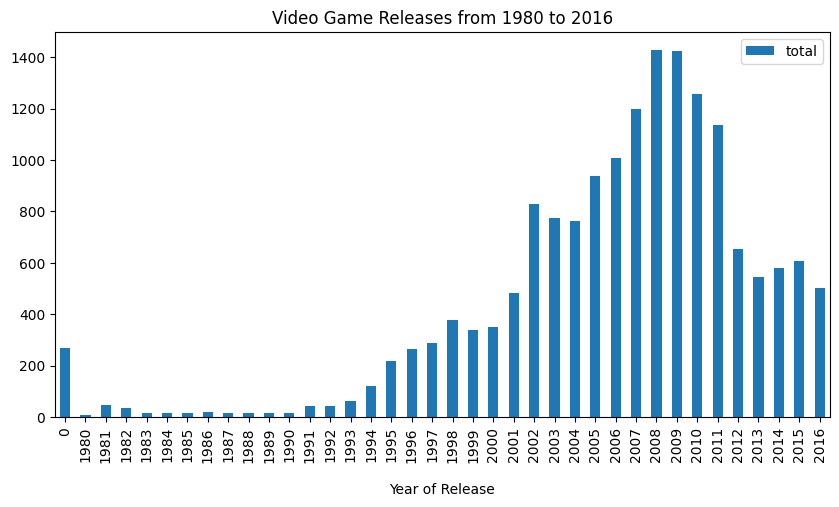

In [224]:
#Number of games released per year
df_per_year = df['year_of_release'].value_counts().sort_index()
df_per_year = df_per_year.to_frame(name='total')
ax = df_per_year.plot(kind='bar', title='Video Game Releases from 1980 to 2016', figsize=[10, 5])
ax.set_xlabel('Year of Release', labelpad=15)
plt.show()

**About the release year:**

Between 2005 and 2011, the highest number of video game releases occurred. However, upon closer examination, there was a significant increase in 2002 compared to 2001, and the peak occurred between 2008 and 2009. After this period, the number of releases began to decline.  

In [225]:
#Total sales analysis by year and platform
sales_platforms = df.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

#Identifying the most successful platforms based on total sales
successed_platforms= sales_platforms.sort_values(ascending= False, by= 'total_sales').head(10)

#Identifying the least successful platforms based on total sales
least_platforms= sales_platforms.sort_values(ascending= False, by= 'total_sales').tail(10)
#least_platforms

successed_platforms

,year_of_release,platform,total_sales
141,2004,ps2,211.81
187,2009,wii,206.97
129,2002,ps2,205.38
135,2003,ps2,184.31
179,2008,wii,171.32
195,2010,x360,170.03
93,1998,ps,169.49
120,2001,ps2,166.43
148,2005,ps2,160.66
200,2011,ps3,156.78


In [226]:
#Creating a variable with information about the most successful platforms
selected_platforms = ['ps2', 'wii', 'x360', 'ps', 'ps3']
most_successful_platforms= sales_platforms[sales_platforms['platform'].isin(selected_platforms)]

#Calculating, among the universe of the most successful platforms, which had the most sales according to the year
most_successful_by_year_idx = sales_platforms.groupby('year_of_release')['total_sales'].idxmax()
most_successful_by_year = sales_platforms.loc[most_successful_by_year_idx, ['year_of_release', 'platform', 'total_sales']]
most_successful_by_year_sorted= most_successful_by_year.sort_values(by= 'year_of_release', ascending= False)
most_successful_by_year_sorted

,year_of_release,platform,total_sales
248,2016,ps4,69.25
238,2015,ps4,118.90
228,2014,ps4,100.00
217,2013,ps3,113.25
208,2012,ps3,107.36
200,2011,ps3,156.78
195,2010,x360,170.03
187,2009,wii,206.97
179,2008,wii,171.32
170,2007,wii,152.77


,year_of_release,platform,total_sales
93,1998,ps,169.49
100,1999,ps,144.53
86,1997,ps,136.17
109,2000,ps,96.37
80,1996,ps,94.70
71,1995,ps,35.96
119,2001,ps,35.59
128,2002,ps,6.67
63,1994,ps,6.03
8,0,ps,3.28


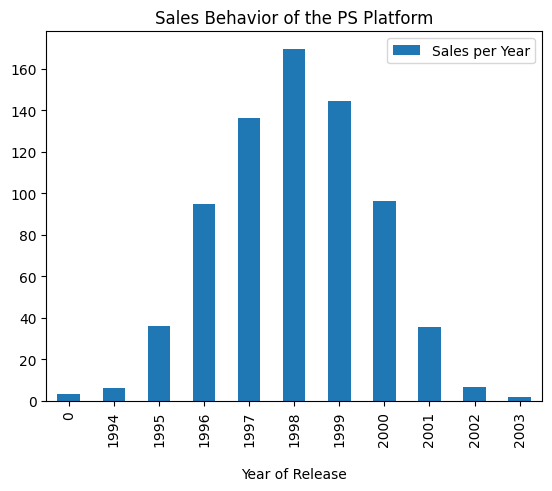

In [227]:
#Analyzing the sales behavior of the PS platform
ps = sales_platforms[sales_platforms['platform'].isin(['ps'])]
ps_graphic= ps.plot(kind= 'bar', x='year_of_release', y='total_sales', title= 'Sales Behavior of the PS Platform', xlabel= 'Year of Release');
ps_graphic.set_xlabel('Year of Release', labelpad=15);
plt.legend(['Sales per Year']);
ps_sorted=ps.sort_values(by= 'total_sales', ascending= False).head(11)
ps_sorted

,year_of_release,platform,total_sales
199,2011,ps2,0.45
191,2010,ps2,5.64
184,2009,ps2,26.40
176,2008,ps2,53.90
167,2007,ps2,75.99
156,2006,ps2,103.42
148,2005,ps2,160.66
141,2004,ps2,211.81
135,2003,ps2,184.31
129,2002,ps2,205.38


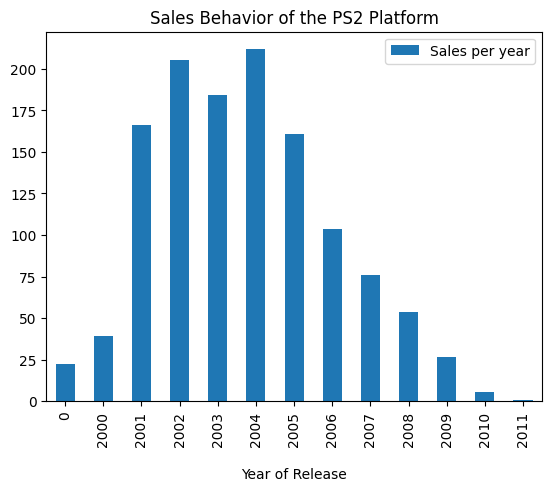

In [228]:
#Analyzing the sales behavior of the PS2 platform
ps2 = sales_platforms[sales_platforms['platform'].isin(['ps2'])]
ps2_graphic= ps2.plot(kind= 'bar', x='year_of_release', y='total_sales', title= 'Sales Behavior of the PS2 Platform', xlabel= 'Year of Release');
ps2_graphic.set_xlabel('Year of Release', labelpad=15);
plt.legend(['Sales per year']);
ps2_sorted= ps2.sort_values(by= 'year_of_release', ascending= False).head(15)

ps2_sorted

,year_of_release,platform,total_sales
187,2009,wii,206.97
179,2008,wii,171.32
170,2007,wii,152.77
159,2006,wii,137.15
194,2010,wii,127.95
203,2011,wii,59.65
211,2012,wii,21.71
13,0,wii,16.33
221,2013,wii,8.59
231,2014,wii,3.75


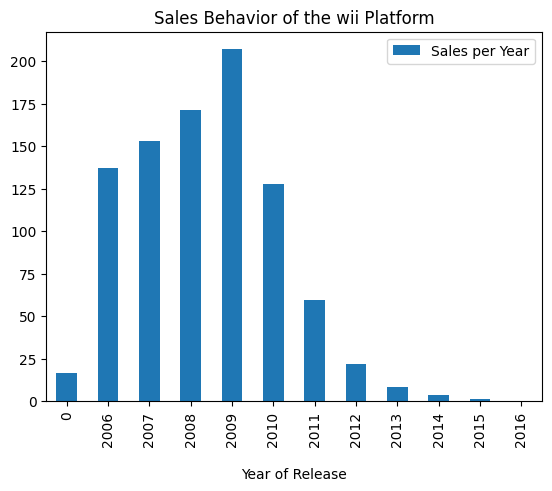

In [229]:
#Analyzing the sales behavior of the Wii platform
wii= sales_platforms[sales_platforms['platform'].isin(['wii'])]
wii_graphic= wii.plot(kind= 'bar', x='year_of_release', y='total_sales', title= 'Sales Behavior of the wii Platform', xlabel= 'Year of Release');
wii_graphic.set_xlabel('Year of Release', labelpad=15);
plt.legend(['Sales per Year']);
wii.sort_values(by= 'total_sales', ascending= False).head(20)

,year_of_release,platform,total_sales
195,2010,x360,170.03
204,2011,x360,143.84
180,2008,x360,135.26
188,2009,x360,120.29
213,2012,x360,99.74
171,2007,x360,95.41
223,2013,x360,88.58
160,2006,x360,51.62
233,2014,x360,34.74
243,2015,x360,11.96


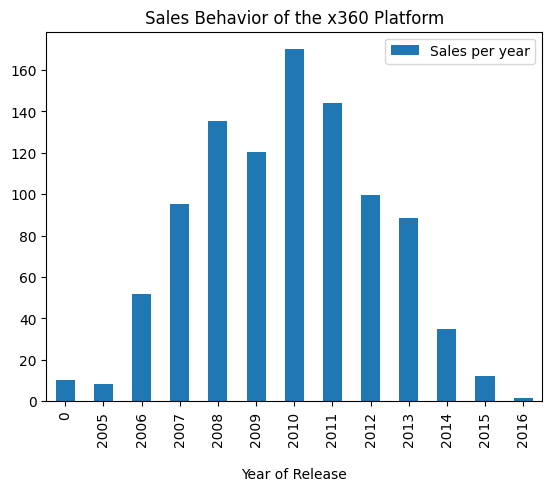

In [230]:
#Analyzing the sales behavior of the Xbox 360 platform
x360=sales_platforms[sales_platforms['platform'].isin(['x360'])]
x360_graphic= x360.plot(kind= 'bar', x='year_of_release', y='total_sales', title= 'Sales Behavior of the x360 Platform', xlabel= 'Year of Release');
x360_graphic.set_xlabel('Year of Release', labelpad=15);
plt.legend(['Sales per year']);
x360.sort_values(by= 'total_sales', ascending= False).head(20)

,year_of_release,platform,total_sales
247,2016,ps3,3.60
237,2015,ps3,16.82
227,2014,ps3,47.76
217,2013,ps3,113.25
208,2012,ps3,107.36
200,2011,ps3,156.78
192,2010,ps3,142.17
185,2009,ps3,130.93
177,2008,ps3,118.52
168,2007,ps3,73.19


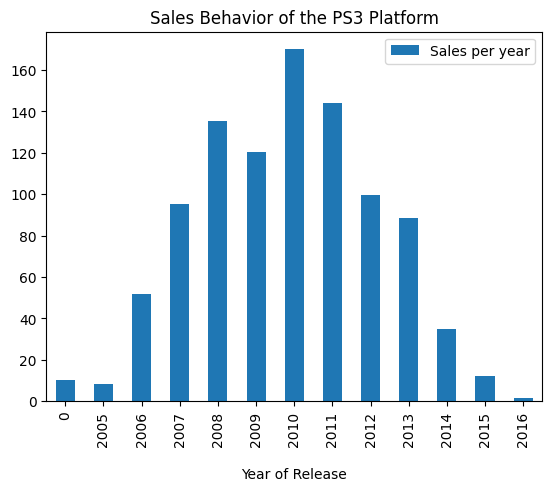

In [231]:
#Analyzing the sales behavior of the Xbox ps3 platform
ps3=sales_platforms[sales_platforms['platform'].isin(['ps3'])]
ps3_graphic= x360.plot(kind= 'bar', x='year_of_release', y='total_sales', title= 'Sales Behavior of the PS3 Platform', xlabel= 'Year of Release');
ps3_graphic.set_xlabel('Year of Release', labelpad=15);
plt.legend(['Sales per year']);
ps3.sort_values(by= 'year_of_release', ascending= False).head(20)

**General Comments:**

* To identify the most popular platforms, the values corresponding to the top 10 highest sales were taken, resulting in a platform universe composed of 'ps2', 'wii', 'x360', 'ps', and 'ps3'. Ultimately, 'ps' was added.
Although platforms like 'ps2', 'wii', 'x360', and 'ps' were the most popular during a certain period, they also later had sales of 3.0 or less.

* 'ps' (PlayStation) experienced its peak between 1994 and the early 2000s. Its peak in video game sales was in 1998. The platform's first record is from 1994 when PlayStation 1 was launched. It began leading video game sales in 1995, a year after its launch, although its sales were not very high compared to other versions of PS that year. Its sales leadership lasted for approximately 6 years. Its decline is related to the release of PlayStation 2 in 2000, which immediately became the top-selling platform from 2001 to 2005.

* 'ps2' (PlayStation 2) managed to lead video game sales a year after its release. It's worth noting that it increased from 39.17 sales in 2000 to 166.43 in 2001, showing rapid growth. It has two significant peaks: one in 2002 with a maximum of 205.38 sales and another in 2004 with 211.81, which is also its peak point. After this year, its sales began to decline, although it maintained its leadership until 2006 when the Wii was launched.

* Something interesting to highlight about the Wii is that it was released in late 2006 and still managed to lead video game sales during that same year, which did not happen in the case of PlayStation 2, which was launched in early 2000 but managed to take sales leadership from PlayStation 1 in 2001, a year after its release.

* Continuing with the Wii, it led video game sales between 2006 and 2009, reaching its peak in 2009 and then starting its decline, being surpassed by the Xbox 360 in 2010.

* The Xbox 360 had the peculiarity of having a late and very short peak, as this platform was released in late 2005, and only in 2010 did it surpass the other 4 platforms in video game sales. That is, it took approximately 5 years to achieve such popularity. It has two significant peaks: one in 2008 with sales of 135.26 and another in 2010 with a total of 170.03. Furthermore, sales leadership only lasted for a year, as in 2011 the PlayStation 3 managed to surpass it in sales.

* The PlayStation 3 was released in 2006 but only managed to lead sales in 2011, surpassing the Xbox 360. Although Sony with its PlayStations has maintained sales leadership most of the time since the release of PS1, between 2006 and 2010 its popularity was overshadowed by the Wii and Xbox 360, so it could be said that the PS3 was perhaps the least popular of the PlayStation, at least until 2016 when the PS4 was still leading sales.

* Regarding the decline of these platforms, all were "discontinued" at different dates, however, all, except the PS3, have the pattern that after their peak, they went from being popular to having very few sales. In fact, counting after the peak in sales, in all four cases, between 6 and 7 years passed not only for them to be "discontinued" but also to reach very low sales, which in the best case do not exceed 3.8. Although it should be noted that Sony has been the company that has managed to maintain sales leadership for the longest time with the various versions of the PlayStation; considering that the Wii's leadership lasted for 4 years (2006-2009) and the Xbox's only for one year (2010).

**Sales behavior of PlayStation relative to the year**

In [232]:
#The data for the PlayStation 4 platform is grouped into the variable 'ps4'.
ps4 = sales_platforms[sales_platforms['platform'].isin(['ps4'])]

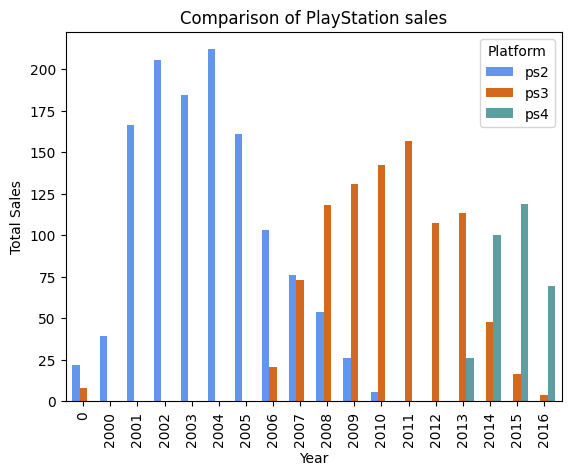

In [233]:
#The dataframes for PS2, PS3, and PS4 are grouped into a single variable
all_playstations = pd.concat([ps2, ps3, ps4])

#The distribution of data within the new dataframe is established
playstation_comparison = all_playstations.pivot(index='year_of_release', columns='platform', values='total_sales')

#This dataframe contains several null values, which is normal because the PlayStation consoles were launched at different times.

#The 'playstation_comparison' dataframe is graphed
colors = {'ps2': 'cornflowerblue', 'ps3': 'chocolate', 'ps4': 'cadetblue'}
color_list = [colors.get(col, 'chocolate') for col in playstation_comparison.columns]
all_ps_graphic = playstation_comparison.plot(kind='bar', width=0.8, color=color_list)

plt.title("Comparison of PlayStation sales")
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend(title='Platform', loc='upper right')

plt.show()

* When comparing the sales behavior of video games associated with different versions of the PlayStation, it could be observed that sales for PlayStation 2 are higher than those for PlayStation 3 and 4, even though the latter have led sales in some periods of time. This is related to the industry's behavior, as observed in the early 2000s, which were the heyday of video games, affecting the volume of sales by platforms.

* PlayStation is taken as an example because it is the most popular platform and has managed to maintain leadership in sales, with a few exceptions. However, analyzing the behavior of this platform reveals that even though PlayStation 3 led sales between 2011 and 2013, and then PS4 did so between 2014 and 2016, they do not surpass the number of video games sold for PS2, which was launched in the early 2000s. This means that although the platform remains one of the most popular, its sales have decreased compared to what was sold in the early 2000s.

In [234]:
print(f'Note: The period 2014 - 2016 was analyzed.')

Note: The period 2014 - 2016 was analyzed.


In [235]:
#The original dataframe is filtered according to the specified time period (2012 - 2016)
chosen_period = df[(df['year_of_release'] >= 2014) & (df['year_of_release'] <= 2016)]
chosen_period


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,NaN,0,,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,pokemon omega ruby-pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,NaN,0,,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,NaN,0,,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,strawberry nauts,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,0,,0.01
16707,aiyoku no eustia,psv,2014,misc,0.00,0.00,0.01,0.00,NaN,0,,0.01
16710,samurai warriors sanada maru,ps3,2016,action,0.00,0.00,0.01,0.00,NaN,0,,0.01
16712,haitaka no psychedelica,psv,2016,adventure,0.00,0.00,0.01,0.00,NaN,0,,0.01


If we observe the graph, it can be seen that there is a decline in sales behavior. This coincides with the graph of video game releases by year, which shows how the industry has been declining since 2009 in both sales and video game releases.


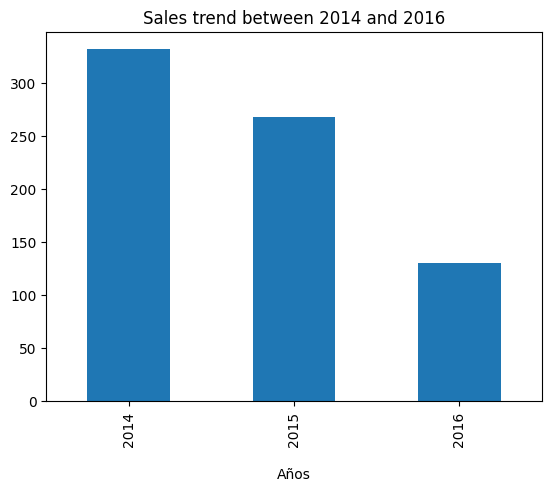

In [236]:
#Sales behavior between 2015 and 2016
sales_behavior= chosen_period.groupby('year_of_release')['total_sales'].sum()
sales_behavior
sales_graphic= sales_behavior.plot(kind= 'bar', x='year_of_release', title= 'Sales trend between 2014 and 2016', xlabel= 'years')
sales_graphic.set_xlabel('Años', labelpad=15);
print(f'If we observe the graph, it can be seen that there is a decline in sales behavior. This coincides with the graph of video game releases by year, which shows how the industry has been declining since 2009 in both sales and video game releases.')

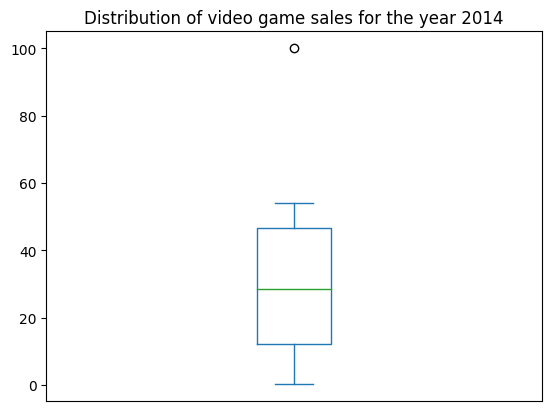

The mean of video game sales for the year 2014 is:33.153


platform
psp       0.24
wii       3.75
psv      11.90
pc       13.28
wiiu     22.03
x360     34.74
3ds      43.76
ps3      47.76
xone     54.07
ps4     100.00
Name: total_sales, dtype: float64

In [237]:
#Sales behavior analysis for the year 2014
period_014 = chosen_period[chosen_period['year_of_release'] == 2014]
period_014
#unique_period_o14= period_014['platform'].nunique()
#unique_period_o14
main_platforms_014= period_014.groupby('platform')['total_sales'].sum()
main_platfoms_sorted= main_platforms_014.sort_values(ascending=True)


#A box plot is plotted for the sales of games in the year 2014.
main_platforms_014.plot(kind= 'box', title='Distribution of video game sales for the year 2014')
plt.xticks([])
plt.show();
mean_014 = main_platforms_014.mean()
print(f'The mean of video game sales for the year 2014 is:{mean_014}')
main_platfoms_sorted

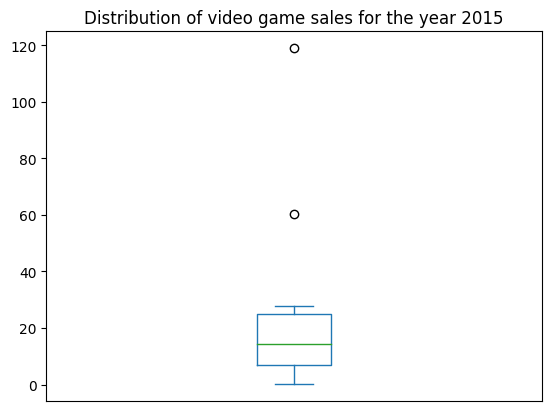

The mean of the dataset of video game sales for the year 2015 is: 26.798000000000002


platform
psp       0.12
wii       1.14
psv       6.25
pc        8.52
x360     11.96
wiiu     16.35
ps3      16.82
3ds      27.78
xone     60.14
ps4     118.90
Name: total_sales, dtype: float64

In [238]:
#Sales behavior analysis for the year 2015
period_015 = chosen_period[chosen_period['year_of_release'] == 2015]
period_015
#unique_period_o15= period_015['platform'].nunique()
#unique_period_o15
main_platforms_015= period_015.groupby('platform')['total_sales'].sum()
main_platforms_015_sorted= main_platforms_015.sort_values(ascending=True)

#A box plot is plotted for the sales of games in the year 2015
main_platforms_015.plot(kind='box', title= 'Distribution of video game sales for the year 2015')
plt.xticks([])
plt.show()

mean_015= main_platforms_015.mean()
print(f'The mean of the dataset of video game sales for the year 2015 is: {mean_015}')
main_platforms_015_sorted

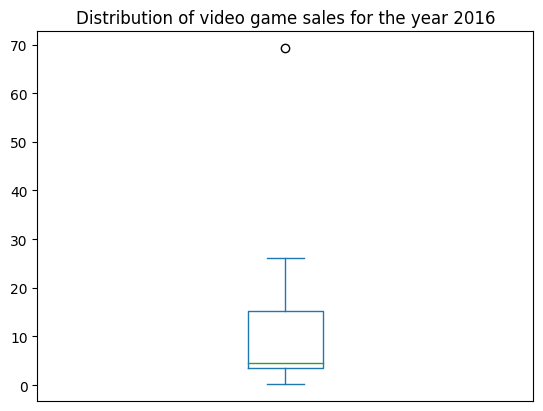

The mean of the dataset of video game sales for the year 2016 is: 14.437777777777777


platform
wii      0.18
x360     1.52
ps3      3.60
psv      4.25
wiiu     4.60
pc       5.25
3ds     15.14
xone    26.15
ps4     69.25
Name: total_sales, dtype: float64

In [239]:
#Sales behavior analysis for the year 2015 2016
period_016 = chosen_period[chosen_period['year_of_release'] == 2016]
period_016
unique_period_o16= period_016['platform'].nunique()
#unique_period_o16
main_platforms_016= period_016.groupby('platform')['total_sales'].sum()
main_platforms_016_sorted= main_platforms_016.sort_values(ascending=True)


#A box plot is plotted for the sales of games in the year 2016
main_platforms_016.plot(kind='box', title= 'Distribution of video game sales for the year 2016')
plt.xticks([])
plt.show()

mean_016= main_platforms_016.mean()
print(f'The mean of the dataset of video game sales for the year 2016 is: {mean_016}')
main_platforms_016_sorted

In [240]:
#main_platforms_016.describe()
#main_platforms_015.describe()
main_platforms_014.describe()

#print(main_platforms_016.median())

count     10.000000
mean      33.153000
std       30.097218
min        0.240000
25%       12.245000
50%       28.385000
75%       46.760000
max      100.000000
Name: total_sales, dtype: float64

General Comments:

The year 2016 has the lowest standard deviation, meaning it is the dataset with the least dispersion. Considering that the mean in this case is 14.43, most of the values are between 0.18 and 5.25. This is why the mean is so close to the first quartile, and only 3 data points (15.14, 26.15, and 69.25) are above the mean, with 26.15 being considered an outlier. Therefore, the third quartile of the diagram is wider because the data within this range are more dispersed. This suggests that within the dataset, a minority accounts for the majority of sales (3DS, XOne, and PS4), and within this small universe, PS4 significantly outperforms the sales of other platforms.

The year 2015 has a slightly higher standard deviation than the previous case, equivalent to 36.74. Here, something similar to the explanation above happens. Most of the values are below the mean, but they are slightly more dispersed because they range from 0.12 to 16.82, with a mean of 26.78. This is why the mean is more separated from the first quartile. Similarly, there are only 3 values above the mean (27.78, 60.14, and 118.90), with the latter two being outliers. This would suggest that in this dataset, there is a considerable difference in sales between Xbox One (XOne) and PS4 compared to the rest of the platforms, highlighting that there is also a substantial difference between these two, with PS4 having higher sales.

Regarding the year 2014, we could say that its standard deviation is 30.09, with a mean of 33.15. Out of 10 data points, 5 are below the mean, ranging from 0.24 to 22.03, and 4 are above the mean, ranging from 34.74 to 54.07. This is why the box is distributed more or less uniformly. There is an outlier that represents the sales of PS4, which amounts to 100. From this, we would say that in 2014, the difference in sales between PS4 and the rest of the platforms was quite significant.

Relationship between user ratings, critic ratings, and sales

In [241]:
#Filter by ps4
critic_ps4= chosen_period[chosen_period['platform'] == 'ps4']

#Calculate the covariance between critic score and total sales for the year 2014
critic_2014_cleaned = critic_ps4.dropna(subset=['user_score'])
covariance_critic= critic_2014_cleaned['total_sales'].cov(critic_2014_cleaned['critic_score'])
print(f'The covariance between total sales and the critics score of PS4 for the period 2014 - 2016 is {covariance_critic}')


The covariance between total sales and the critics score of PS4 for the period 2014 - 2016 is 8.12335979403562


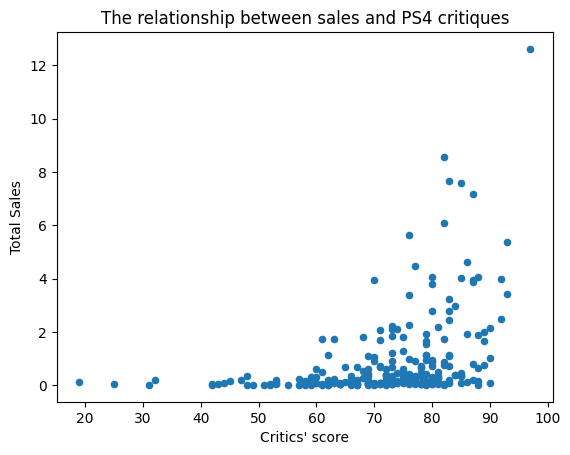

,name,critic_score,total_sales
79,grand theft auto v,97.0,12.62
72,fifa 16,82.0,8.58
29,call of duty advanced warfare,83.0,7.66
73,fifa 17,85.0,7.60
67,fallout 4,87.0,7.17
...,...,...,...
109,mark mcmorris infinite air,49.0,0.01
175,sherlock holmes the devil's daughter,70.0,0.01
185,super dungeon bros,42.0,0.01
55,dungeons 2,61.0,0.01


In [242]:
#Show in detail the relationship between critic score and total sales. PS4 is chosen because it's the most popular in the selected period
ps4= critic_ps4.groupby(['name','critic_score'])['total_sales'].sum().reset_index()
ps4_sorted= ps4.sort_values(by= 'total_sales', ascending=False) #Organiza los datos en funcion de las ventas

#Graph a scatter plot
ps4.plot(kind='scatter', x='critic_score', y='total_sales', xlabel= "Critics' score", ylabel= 'Total Sales', title = 'The relationship between sales and PS4 critiques')
plt.show()
ps4_sorted

In [243]:
# Calculate the covariance between the user score and total sales for the period 2014-2016
user_2014_cleaned = critic_ps4.dropna(subset=['user_score'])

# Replace NaN values in 'user_score' with 0
user_2014_cleaned['user_score'] = user_2014_cleaned['user_score'].fillna(0)

# Ensure 'total_sales' and 'user_score' columns are numeric
user_2014_cleaned['total_sales'] = pd.to_numeric(user_2014_cleaned['total_sales'], errors='coerce')
user_2014_cleaned['user_score'] = pd.to_numeric(user_2014_cleaned['user_score'], errors='coerce')

# Calculate the covariance
covariance_user_2014 = user_2014_cleaned['total_sales'].cov(user_2014_cleaned['user_score'])
print(f'The covariance between total sales and the user score for PS4 for the period 2014 - 2016 is {covariance_user_2014}')

The covariance between total sales and the user score for PS4 for the period 2014 - 2016 is 0.5223466344393176


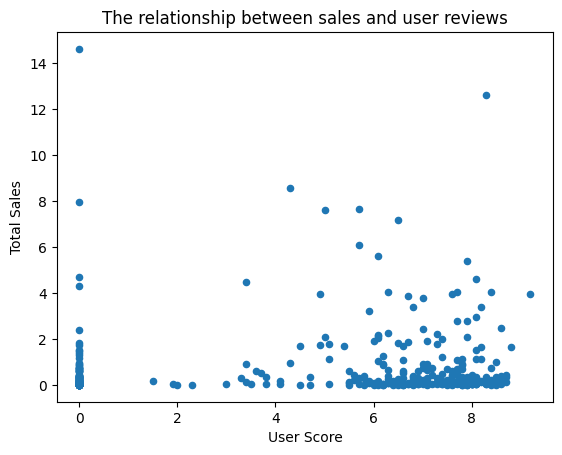

,name,user_score,platform,total_sales
43,call of duty black ops 3,0.0,ps4,14.63
130,grand theft auto v,8.3,ps4,12.62
112,fifa 16,4.3,ps4,8.58
288,star wars battlefront (2015),0.0,ps4,7.98
42,call of duty advanced warfare,5.7,ps4,7.66
113,fifa 17,5.0,ps4,7.60
104,fallout 4,6.5,ps4,7.17
111,fifa 15,5.7,ps4,6.08
59,destiny,6.1,ps4,5.64
347,uncharted 4 a thief's end,7.9,ps4,5.39


In [244]:
# Convert 'user_score' column to numeric, handling errors and NaN values
user_sales['user_score'] = pd.to_numeric(user_sales['user_score'], errors='coerce')

# Drop rows with NaN values in 'user_score' column
user_sales.dropna(subset=['user_score'], inplace=True)

# Plot the scatter plot with the corrected data
user_sales.plot(kind='scatter', x='user_score', y='total_sales', xlabel='User Score', ylabel='Total Sales', title='The relationship between sales and user reviews')
plt.show()

# Sort and display the top 20 rows of the DataFrame
user_sales_sorted = user_sales.sort_values(by='total_sales', ascending=False).head(20)
user_sales_sorted

In [245]:
#A DataFrame is created with the names of the video games, platforms, and total sales. 
df_games_gouped= chosen_period.groupby(['name', 'platform', 'year_of_release'])['total_sales'].sum().reset_index()
df_games_gouped

#This filter is created to observe the comparison of video games by platform. Just change the name.
df_by_games_filtered= df_games_gouped[df_games_gouped['name'] == 'spirits and demons 5 game pack']


df_games_gouped.sample(20)
df_by_games_filtered

,name,platform,year_of_release,total_sales
1312,spirits and demons 5 game pack,pc,2015,0.02


In [246]:
#Most successful video games in the chosen period
df_games_gouped.sort_values(by= 'total_sales', ascending= False)
most_succesed_videogames= df_games_gouped.sort_values(by= 'total_sales', ascending= False).head(5)
most_succesed_videogames

,name,platform,year_of_release,total_sales
188,call of duty black ops 3,ps4,2015,14.63
550,grand theft auto v,ps4,2014,12.62
1048,pokemon omega ruby-pokemon alpha sapphire,3ds,2014,11.68
479,fifa 16,ps4,2015,8.58
1321,star wars battlefront (2015),ps4,2015,7.98


In [247]:
#Least successful video games in the selected period
least_succesed_videogames = df_games_gouped.sort_values(by= 'total_sales', ascending= False).tail(5)
least_succesed_videogames

,name,platform,year_of_release,total_sales
624,hyakka yakou,psv,2015,0.01
622,htol#niq the firefly diary,psv,2014,0.01
616,"horse life 4 my horse, my friend, my champion",3ds,2015,0.01
611,hitotsu tobashi renai v,psv,2015,0.01
1688,zombiu,xone,2016,0.01


In [248]:
#Create this filter to search for video games by platform. Just change the platform name.
df_by_platform = chosen_period[chosen_period['platform'] == 'wii']
df_by_platform

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
850,just dance 2015,wii,2014,misc,0.99,0.85,0.0,0.17,NaN,8.4,E10+,2.01
2179,just dance 2016,wii,2015,misc,0.41,0.46,0.0,0.08,NaN,Nan,E10+,0.95
2180,skylanders trap team,wii,2014,action,0.41,0.46,0.0,0.08,NaN,Nan,E10+,0.95
3611,fifa 15,wii,2014,sports,0.15,0.37,0.0,0.04,NaN,4.3,E,0.56
7991,how to train your dragon 2,wii,2014,adventure,0.04,0.13,0.0,0.01,NaN,Nan,E10+,0.18
8009,just dance 2017,wii,2016,misc,0.06,0.11,0.0,0.01,NaN,Nan,E10+,0.18
8941,skylanders superchargers,wii,2015,action,0.02,0.12,0.0,0.01,NaN,0,,0.15
13570,disney planes fire & rescue,wii,2014,action,0.00,0.04,0.0,0.00,NaN,0,,0.04
14682,barbie and her sisters puppy rescue,wii,2015,action,0.00,0.03,0.0,0.00,NaN,Nan,E,0.03
16144,penguins of madagascar,wii,2014,action,0.00,0.01,0.0,0.00,NaN,Nan,E,0.01


In [249]:
#Distribution of video games by genre
games_by_genre= chosen_period.groupby('genre')['total_sales'].sum().reset_index()
games_by_genre_sorted= games_by_genre.sort_values(by='total_sales', ascending= True)
games_by_genre_sorted

,genre,total_sales
5,puzzle,2.21
11,strategy,3.96
9,simulation,13.13
1,adventure,17.55
4,platform,18.09
6,racing,27.52
2,fighting,28.22
3,misc,37.55
7,role-playing,101.44
10,sports,109.48


**General Comments:**

* The covariance between total sales and user ratings is -0.09, indicating a weak relationship between the two variables or an inverse behavior, meaning when one decreases, the other increases.

* On the other hand, if we analyze the relationship between sales and user ratings for the specific case of PS4, a directly proportional relationship between the two variables could not be established either. Some cases with high sales but lower than 5 ratings can be found, as well as cases of high sales and high ratings also. Therefore, it cannot be affirmed that there is such a clear direct relationship.

* It is noteworthy that the most popular video games in the chosen time period were Call of Duty: Black Ops 3, Grand Theft Auto V, Pokémon Omega Ruby-Pokémon Alpha Sapphire, FIFA 16, and Star Wars Battlefront (2015). It is emphasized that most of these video games were released in the year 2015, with only 2 being released in 2014, and none of the video games released in 2016 are within the top 5. Furthermore, out of the 5 video games, 4 are for PS4 and one for 3DS.

* Regarding the least successful video games, 3 of them were released for PSV, one for 3DS, and one for XOne. Here, there are video games from all 3 selected years, 1 from 2004, 3 from 2015, and 1 from 2016.

* In terms of genre, between the period 2014 - 2016, Puzzle was the least sold, with a figure of 2.21, and Action was the most popular with 199.36, followed by Shooter with 170.94, Sports with 109.48, and Role-Playing with 101.44. These are the only genres that are above 100, the rest of the set ranges between 37.55 and 2.21, so it could be affirmed that these last four mentioned genres concentrate a large part of the sales of the dataset.

**Analysis by Regions**

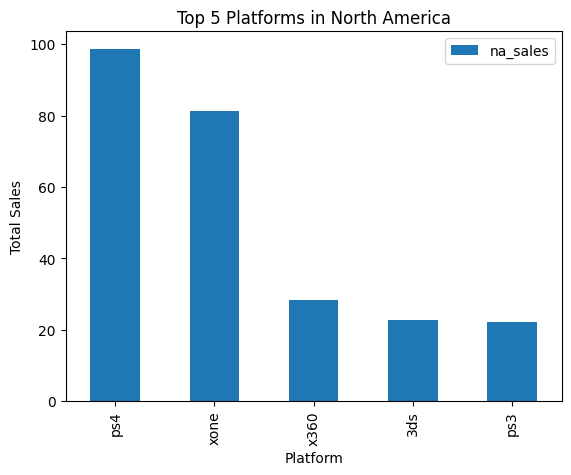

In [250]:
#Top 5 platforms in North America
max_na= chosen_period.groupby('platform')['na_sales'].sum().reset_index()
top_platforms_na = max_na.sort_values(by='na_sales', ascending=False)
platforms_na_5 = top_platforms_na.head(5)
platforms_na_5

platforms_na_5.plot(kind= 'bar', x='platform', y='na_sales', xlabel= 'Platform', ylabel='Total Sales', title='Top 5 Platforms in North America')
plt.show()

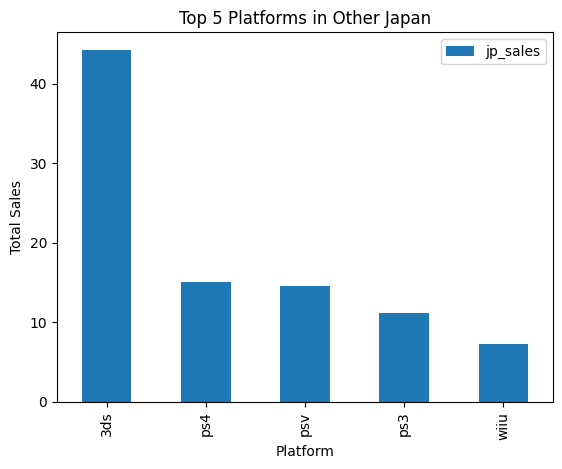

In [251]:
#Top 5 platforms in Japan
max_jp= chosen_period.groupby('platform')['jp_sales'].sum().reset_index()
top_platforms_jp = max_jp.sort_values(by='jp_sales', ascending=False)
platforms_jp_5 = top_platforms_jp.head(5)
platforms_jp_5

platforms_jp_5.plot(kind= 'bar', x='platform', y='jp_sales', xlabel= 'Platform', ylabel='Total Sales', title='Top 5 Platforms in Other Japan')
plt.show()

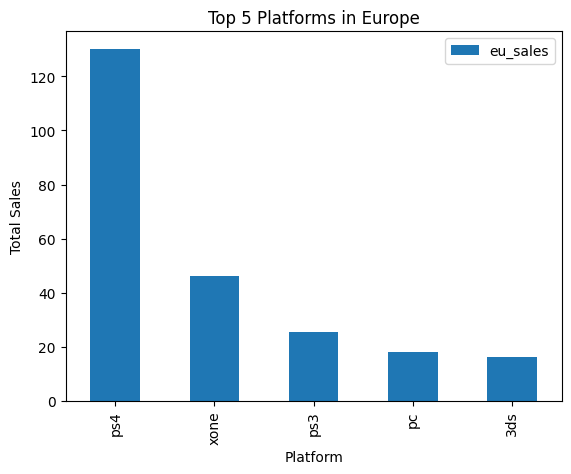

In [252]:
#Top 5 platforms in Europe
max_eu= chosen_period.groupby('platform')['eu_sales'].sum().reset_index()
top_platforms_eu = max_eu.sort_values(by='eu_sales', ascending=False)
platforms_eu_5 = top_platforms_eu.head(5)
platforms_eu_5

platforms_eu_5.plot(kind= 'bar', x='platform', y='eu_sales', xlabel= 'Platform', ylabel='Total Sales', title='Top 5 Platforms in Europe')
plt.show()

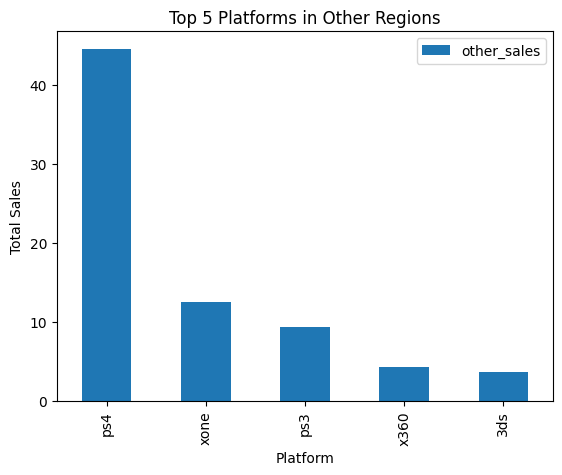

In [253]:
#Top 5 plataforms in other regions
max_other= chosen_period.groupby('platform')['other_sales'].sum().reset_index()
top_platforms_other = max_other.sort_values(by='other_sales', ascending=False)
platforms_other_5 = top_platforms_other.head(5)
platforms_other_5

platforms_other_5.plot(kind= 'bar', x='platform', y='other_sales', xlabel= 'Platform', ylabel='Total Sales', title='Top 5 Platforms in Other Regions')
plt.show()

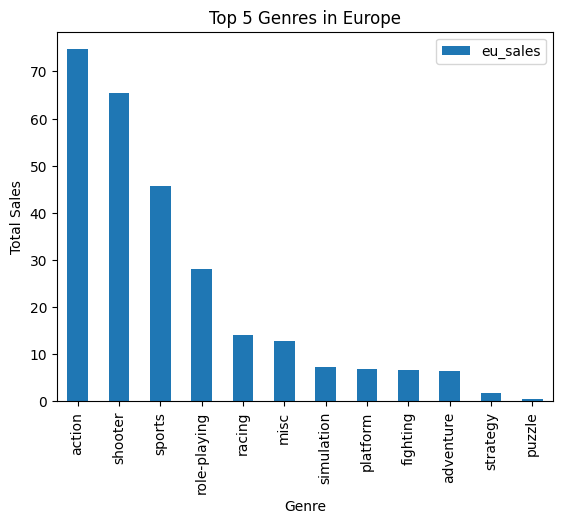

In [254]:
#Sales according to the video game genre in Europe
eu_genero= chosen_period.groupby(['genre'])['eu_sales'].sum().reset_index()
sales_genero_eu = eu_genero.sort_values(by='eu_sales', ascending=False)
sales_genero_eu

sales_genero_eu.plot(kind= 'bar', x='genre', y='eu_sales', xlabel= 'Genre', ylabel='Total Sales', title='Top 5 Genres in Europe')
plt.show()

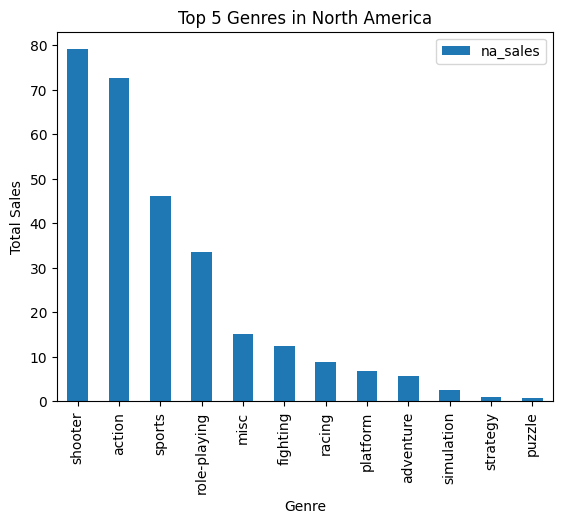

In [255]:
#Sales according to the video game genre in North America
na_genero= chosen_period.groupby(['genre'])['na_sales'].sum().reset_index()
sales_genero_na = na_genero.sort_values(by='na_sales', ascending=False)
sales_genero_na

sales_genero_na.plot(kind= 'bar', x='genre', y='na_sales', xlabel= 'Genre', ylabel='Total Sales', title='Top 5 Genres in North America')
plt.show()

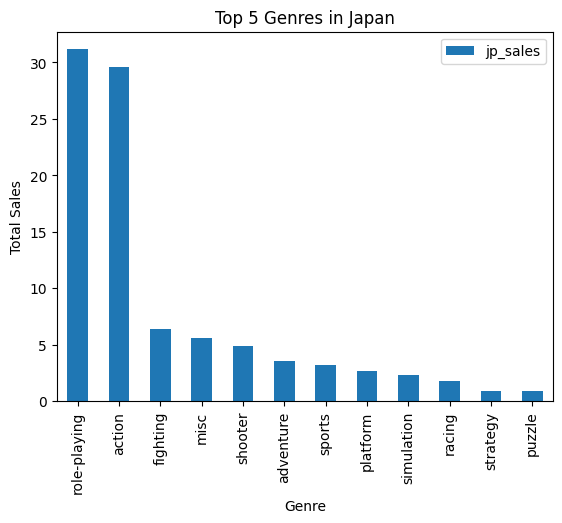

In [256]:
#Sales according to the video game genre in Japan
jp_genero= chosen_period.groupby(['genre'])['jp_sales'].sum().reset_index()
sales_genero_jp = jp_genero.sort_values(by='jp_sales', ascending=False)
sales_genero_jp

sales_genero_jp.plot(kind= 'bar', x='genre', y='jp_sales', xlabel= 'Genre', ylabel='Total Sales', title='Top 5 Genres in Japan')
plt.show()

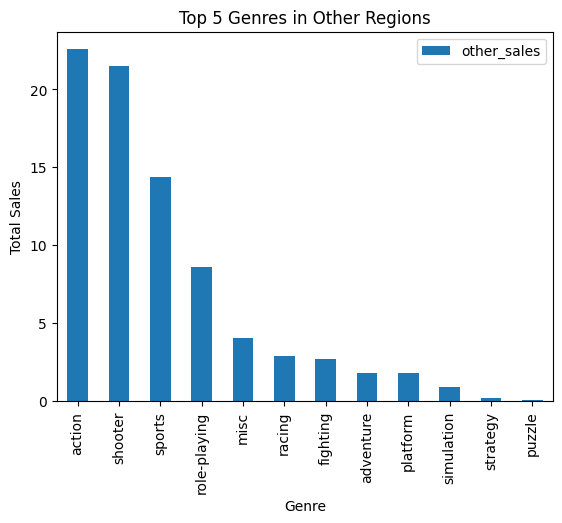

In [257]:
#Sales according to the video game genre in other regions
other_genero= chosen_period.groupby(['genre'])['other_sales'].sum().reset_index()
sales_genero_other = other_genero.sort_values(by='other_sales', ascending=False)
sales_genero_other

sales_genero_other.plot(kind= 'bar', x='genre', y='other_sales', xlabel= 'Genre', ylabel='Total Sales', title='Top 5 Genres in Other Regions')
plt.show()

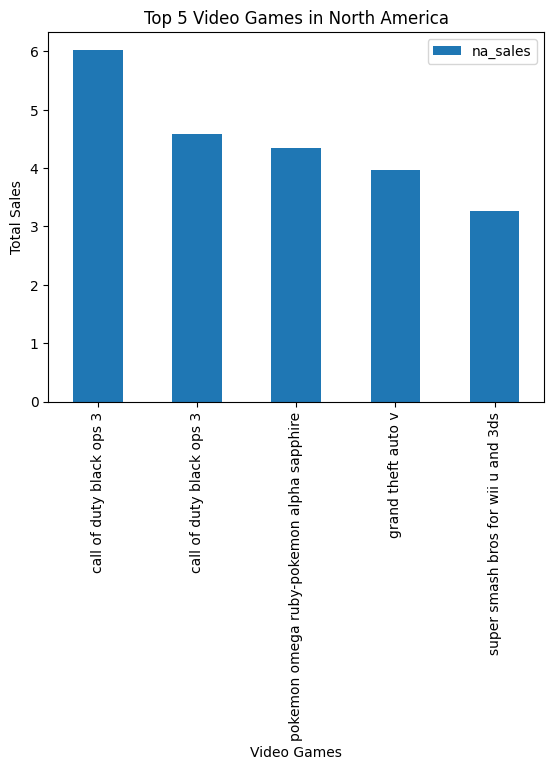

In [258]:
#Top 5 Video Games in North America
games_na= chosen_period.groupby(['name', 'platform', 'year_of_release'])['na_sales'].sum().reset_index()
top_games_na = games_na.sort_values(by='na_sales', ascending=False)
games_na_5 = top_games_na.head(5)
games_na_5

games_na_5.plot(kind= 'bar', x='name', y='na_sales', xlabel= 'Video Games', ylabel='Total Sales', title='Top 5 Video Games in North America')
plt.show()

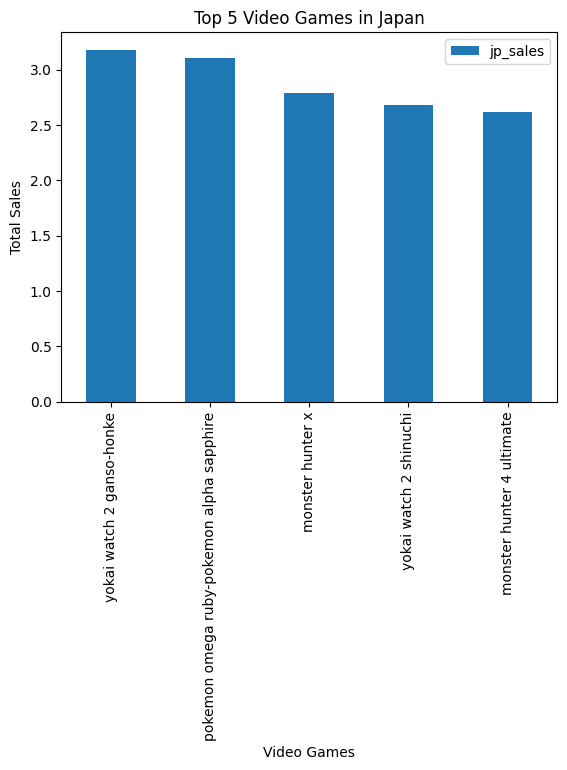

In [259]:
#Top 5 Video Games in Japan
games_jp= chosen_period.groupby(['name', 'platform', 'year_of_release'])['jp_sales'].sum().reset_index()
top_games_jp = games_jp.sort_values(by='jp_sales', ascending=False)
games_jp_5 = top_games_jp.head(5)
games_jp_5

games_jp_5.plot(kind= 'bar', x='name', y='jp_sales', xlabel= 'Video Games', ylabel='Total Sales', title='Top 5 Video Games in Japan')
plt.show()

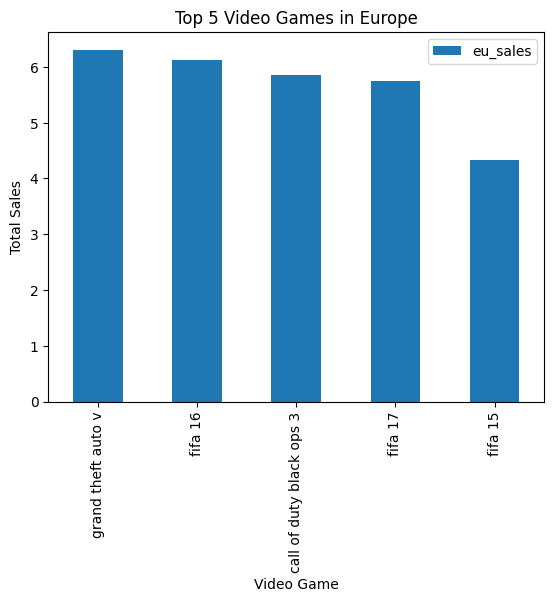

In [260]:
#Top 5 Video Games in Europe
games_eu= chosen_period.groupby(['name', 'platform', 'year_of_release'])['eu_sales'].sum().reset_index()
top_games_eu = games_eu.sort_values(by='eu_sales', ascending=False)
games_eu_5 = top_games_eu.head(5)
games_eu_5

games_eu_5.plot(kind= 'bar', x='name', y='eu_sales', xlabel= 'Video Game', ylabel='Total Sales', title='Top 5 Video Games in Europe')
plt.show()

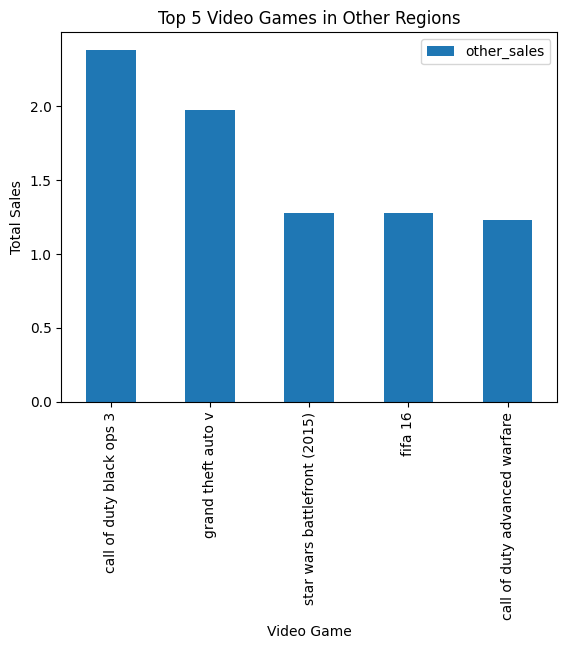

In [261]:
#Top 5 Video Games in other regions
games_other= chosen_period.groupby(['name', 'platform', 'year_of_release'])['other_sales'].sum().reset_index()
top_games_other = games_other.sort_values(by='other_sales', ascending=False)
games_other_5 = top_games_other.head(5)
games_other_5

games_other_5.plot(kind= 'bar', x='name', y='other_sales', xlabel= 'Video Game', ylabel='Total Sales', title='Top 5 Video Games in Other Regions')
plt.show()

In [262]:
#Sales according to the video game rating in North America
na_esrb= chosen_period.groupby(['rating'])['na_sales'].sum().reset_index()
sales_esrb_na = na_esrb.sort_values(by='na_sales', ascending=False)
sales_esrb_na

#Sales according to the video game rating in Europe
eu_esrb= chosen_period.groupby(['rating'])['eu_sales'].sum().reset_index()
sales_esrb_eu = eu_esrb.sort_values(by='eu_sales', ascending=False)
sales_esrb_eu

#Sales according to the video game rating in Japan
jp_esrb= chosen_period.groupby(['rating'])['jp_sales'].sum().reset_index()
sales_esrb_jp = jp_esrb.sort_values(by='jp_sales', ascending=False)
sales_esrb_jp

#Sales according to the video game rating in other regions
other_esrb= chosen_period.groupby(['rating'])['other_sales'].sum().reset_index()
sales_esrb_other = other_esrb.sort_values(by='other_sales', ascending=False)
sales_esrb_other

,rating,other_sales
3,M,28.67
0,,18.40
1,E,15.39
4,T,11.33
2,E10+,7.83


*General Comments:*

* Regarding the most popular platforms between 2014 and 2016, the data varies by region. In North America and other regions, PS4, XOne, X360, 3DS, and PS3 are the most popular. In Europe, the trend is somewhat similar, but X360 is not in the top 5, being replaced by PC games. Japan shows the most variation, where the most popular platforms are 3DS, PS4, PSV, PS3, and WiiU.

* In general terms, in Europe, North America, and other regions, PS4 is the most popular platform. However, in Japan, 3DS is the most popular, significantly surpassing PS4, which ranks second.

* Regarding regional sales by genre, in all four cases, Puzzle and Strategy are the least popular genres. Although the most popular genres vary slightly, in Europe, North America, and other regions, Action, Shooter, and Sports are the best-selling genres, while in Japan, Role-Playing and Action drastically dominate sales.

* Concerning the most popular video games, in North America and other regions, Call of Duty is the most popular. In Europe, FIFA games predominate, although the most popular game is Grand Theft Auto V, with Call of Duty in third place with similar sales. Japan shows a significant difference, as the most popular games do not match those in other regions. The best-selling game is Yo-kai Watch 2, and FIFA and Call of Duty do not appear among the most popular games, unlike in other regions.


*Hypothesis*

In [274]:
# Convert 'user_score' column to numeric, handling errors and NaN values
user_rating_xone = user_rating_xone.copy()
user_rating_xone['user_score'] = pd.to_numeric(user_rating_xone['user_score'], errors='coerce')

user_rating_pc = user_rating_pc.copy()
user_rating_pc['user_score'] = pd.to_numeric(user_rating_pc['user_score'], errors='coerce')

# Perform the t-test after ensuring both arrays contain only numeric values
t_stat, p_value = ttest_ind(user_rating_xone['user_score'], user_rating_pc['user_score'])
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")



Fail to reject the null hypothesis


In [271]:
#Hypothesis 2: User ratings for Action and Sports genres are different.

# Ensure proper data types
user_rating_xone['user_score'] = pd.to_numeric(user_rating_xone['user_score'], errors='coerce')
user_rating_pc['user_score'] = pd.to_numeric(user_rating_pc['user_score'], errors='coerce')

# Drop NaN values after conversion
user_rating_xone.dropna(subset=['user_score'], inplace=True)
user_rating_pc.dropna(subset=['user_score'], inplace=True)

# Perform t-test
t_stat, p_value = ttest_ind(user_rating_xone['user_score'], user_rating_pc['user_score'])

# Set significance level
alpha = 0.05

# Print results
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


Comments on Hypothesis Formulation:

* In the first hypothesis, the null hypothesis is that the user ratings for Xbox 360 and PC are the same, and the alternative hypothesis is that they are different.

* In the case of the second hypothesis, the null hypothesis is that the user ratings for the Action and Sports genres are the same, and the alternative hypothesis is that they are different.

* The t-test (ttest_ind) was used to analyze whether the means are equal or different because the datasets being compared are independent of each other.

### 5. **General Conclusions:**

* There are several elements to consider when launching a video game. One important factor is the target market. Although trends in North America and Europe are quite similar, Japan has different preferences. That's why it is crucial to consider the market you are targeting.

In addition to the target market, other important elements can be useful. 

* Creating a video game that aligns with the characteristics of the most popular genres can help ensure its success or failure. Additionally, the platform on which it will be launched is important. However, with the platform, it is also important to consider the timing, as sales leadership can change. PlayStation is the most popular and consistently leading platform, so designing a video game for this one could increase the likelihood of success. Nevertheless, it is good to review the performance of other platforms for the year of interest.

* Another factor to consider regarding the performance of platforms is the release years, as this can impact sales leadership. For instance, Wii led sales for three years, but then Sony released the 5th version of PlayStation, taking the sales lead from Wii. Therefore, it is good to consider these dynamics for future projections. These patterns are very evident with PlayStation, even between different models of PlayStation

* Regarding the relationship between critics' reviews and video game sales, it is considered not very clear, so it is not necessarily a determining factor.